In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [72]:
# Load iris dataset
iris = load_iris()

In [73]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [75]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target.reshape(-1, 1) [:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [77]:
X = iris.data # Features (for X)
y = iris.target.reshape(-1, 1) # Target variables (for y)

In [78]:
# First five data points
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [79]:
# One-hot encode the target variable
encoder = OneHotEncoder(categories='auto') #objects goes to the label, he automatically finds a way to encode those labels
y = encoder.fit_transform(y).toarray() #Passing orginal array to quick transform array

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting our entire data set into train test, here test_size defers 20% of whole set, random state shuffles the entire set so randomly the numbers are selected

In [81]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)), #Input layer is embedded inside the first one but technically there are four layers, neurons prefer non linearity inorder to break the linearity we use activation
    tf.keras.layers.Dense(8, activation='relu'), # it is a rule to use input_shape in dense in order to view how many inputs are entered
    tf.keras.layers.Dense(3, activation='softmax') # softmax function gives us the probability value that is equal for each class
])

In [82]:
model.compile(optimizer='adam', # it is to find to minimum value for breaks and bias in the neuron networks
              loss='categorical_crossentropy', # going to calculate the error
              metrics=['accuracy']) # entire model is evaluated on the accuracy

In [83]:
history = model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1, validation_data=(X_test, y_test)) # epochs will do the forward and backward propagration 100 times, backsize = 5 data points at a time, verbose gives the output from accuracy and the rest

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 2.3132 - accuracy: 0.3417 - val_loss: 2.1987 - val_accuracy: 0.3000
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.8246 - accuracy: 0.3417 - val_loss: 1.7547 - val_accuracy: 0.3000
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.4925 - accuracy: 0.3417 - val_loss: 1.4690 - val_accuracy: 0.3000
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2883 - accuracy: 0.3417 - val_loss: 1.2426 - val_accuracy: 0.3000
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1020 - accuracy: 0.3417 - val_loss: 1.0664 - val_accuracy: 0.3000
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9338 - accuracy: 0.3417 - val_loss: 0.8744 - val_accuracy: 0.3000
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7675 - accuracy: 0.7667 - val_loss: 0.7277 - val_accuracy: 0.8333
Epoch 8/100


In [84]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Validation Accuracy: {history.history["val_accuracy"][-1]}')

1/1 [==============================] - 0s 147ms/step - loss: 0.1285 - accuracy: 0.9333
Test Loss: 0.12849946320056915
Test Accuracy: 0.9333333373069763
Validation Accuracy: 0.9333333373069763


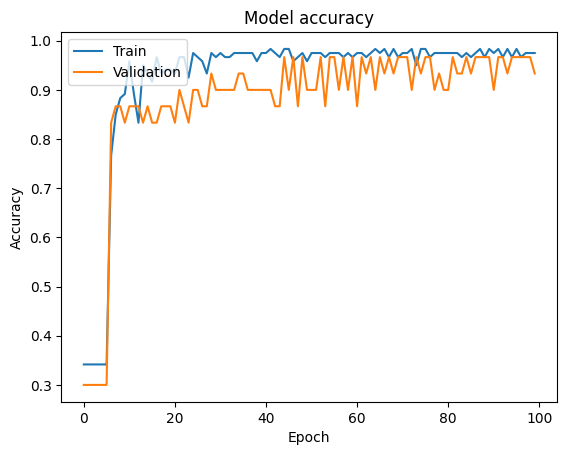

In [85]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [89]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

1/1 [==============================] - 0s 23ms/step


In [90]:
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [91]:
class_report = classification_report(y_test_classes, y_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

